In [1]:
from google.colab import drive
from google.colab import userdata
drive.mount('/content/drive')

Mounted at /content/drive


## Escolha do Modelo LLM Utilizando LLaMA 3
O modelo LLaMA 3 foi escolhido por apresentar diversos fatores vantajosos, como código open source, a gratuidade, facilidade de modificação e personalização, além de sua alta performance e eficiência em tarefas de processamento de linguagem natural.

1. **Open Source**
  - O LLaMA 3 é um modelo de código aberto, o que significa que o código-fonte está disponível para a comunidade. Essa característica promove a transparência no desenvolvimento e permite que desenvolvedores e pesquisadores possam: Inspecionar e entender o funcionamento interno do modelo.
  - Contribuir para melhorias e otimizações contínuas.
  - Adaptar o modelo para necessidades específicas, promovendo inovação colaborativa.

2. **Grauidade**

  - Optar por um modelo gratuito como o LLaMA 3 reduz significativamente os custos associados ao desenvolvimento e implementação de soluções baseadas em inteligência artificial.
  - Facilidade de experimentação sem a necessidade de investimentos financeiros elevados.
  - Redução de barreiras para a entrada de novos participantes no campo de machine learning e deep learning.

3. **Facilidade de Modificação e Customização**

  - A natureza open source do LLaMA 3 facilita a personalização e modificação do modelo conforme as necessidades específicas do projeto.
  - Ajustes finos (fine-tuning) para melhorar o desempenho em tarefas específicas.
  - Integração com diferentes frameworks e ferramentas de machine learning.
  - Implementação de novas funcionalidades ou melhorias sem restrições impostas por licenças proprietárias.

4. **Performance e Eficiência**

  - O LLaMA 3 demonstra um desempenho robusto em diversas tarefas de processamento de linguagem natural (NLP), equilibrando eficiência e precisão. As vantagens adicionais são:
  - Escalabilidade, permitindo o treinamento e a implementação em diferentes escalas de dados e complexidade.
  - Otimizações que aproveitam melhor os recursos computacionais disponíveis, especialmente quando utilizados em conjunto com GPUs no Google Colab.

5. **Compatibilidade com Infraestruturas Existentes**

  - O LLaMA 3 é compatível com diversas infraestruturas e ferramentas populares no ecossistema de machine learning, facilitando a sua integração com pipelines de desenvolvimento já estabelecidos.
  - Compatibilidade com TensorFlow e PyTorch, dois dos frameworks mais utilizados na área.
  - Facilidade de deploy em diferentes ambientes, seja em nuvem ou em servidores locais.
  - Interoperabilidade com ferramentas de gerenciamento de modelos e monitoramento de desempenho.

**Referências:**

META AI. LLaMA 3: Open Source Language Model. Disponível em: https://ai.meta.com/llama/. Acesso em: 25 abr. 2024.


## Instalando pacotes necessários

In [2]:
!pip install "unsloth[colab-new] @ git+https://github.com/unslothai/unsloth.git"
!pip install --no-deps "xformers<0.0.27" "trl<0.9.0" peft accelerate bitsandbytes
!pip install triton
!pip install xformers

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-qggjlx4f/unsloth_6f8c1dca5dae4b8c862cfe9f5dcae91c
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-install-qggjlx4f/unsloth_6f8c1dca5dae4b8c862cfe9f5dcae91c
  Resolved https://github.com/unslothai/unsloth.git to commit c3f4e9a87d964ecee1efd9963f497119edbefaab
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.9/105.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
  

In [3]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


## Importando bibliotecas utilizadas

In [4]:
import torch
import pandas as pd
import os
import tensorflow as tf
import time
from trl import SFTTrainer
from datasets import load_dataset
from datasets import Dataset
from transformers import TrainingArguments, TextStreamer
from unsloth.chat_templates import get_chat_template
from unsloth import FastLanguageModel, is_bfloat16_supported
from transformers import TextStreamer
from unsloth.chat_templates import get_chat_template

🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


## Intruções para treinamento

In [5]:
print("GPUs disponíveis: ", len(tf.config.list_physical_devices('GPU')))

GPUs disponíveis:  1


### Imports Data Augmentation

In [6]:
# Standard library imports
import os
import csv
import json

# Third-party library imports
import pandas as pd
from pydantic import BaseModel
from openai import OpenAI
from getpass import getpass
from typing import List

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("/content/data.csv", encoding="utf-8", delimiter='|')

In [10]:
df.head()

,"intent,question,processed_question"
0,"Acesso a conta,Fiz mudanças no site e gostaria..."
1,"Acesso a conta,""Alterei o site recentemente, a..."
2,"Acesso a conta,""Arrumei o site, mas tô meio pe..."
3,"Acesso a conta,Modifiquei o layout do site e p..."
4,"Acesso a conta,O site tá diferente. Alguém sab..."


## Data Augmentation

In [11]:
api_key = getpass('Insira a chave da API do OpenAI: ')
os.environ['OPENAI_API_KEY'] = api_key

Insira a chave da API do OpenAI: ··········


In [12]:
api_key = os.getenv('OPENAI_API_KEY')
client = OpenAI(api_key=api_key)

def load_dataset_from_csv(file_path):
    """
    Load a dataset from a CSV file.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        list: A list of dictionaries containing 'label' and 'sentence'.
    """
    dataset = []
    with open(file_path, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            dataset.append({'label': row['intent'].strip(), 'sentence': row['question'].strip()})
    print(f"Carregadas {len(dataset)} linhas de {file_path}")
    return dataset

class Sentence(BaseModel):
    """
    A Pydantic model representing a sentence with alternative texts.
    """
    alternative_text: List[str]

def generate_alternative_sentences(intent, sentence, n_augmentations):
    """
    Generate alternative sentences for data augmentation.

    Args:
        intent (str): The intent label of the sentence.
        sentence (str): The original sentence.
        n_augmentations (int): The number of augmentations to generate.

    Returns:
        list: A list of alternative sentences.
    """
    prompt = (
        f"Gere {n_augmentations} versões diversas da seguinte frase com a intenção '{intent}':\n"
        f"{sentence}\n\n"
        "Instruções:\n"
        "- Escreva como um brasileiro.\n"
        "- Use abreviações às vezes.\n"
        "- Varie os estilos linguísticos, alternando entre formal e informal aleatoriamente mas não use gírias como 'ixi', 'véi', entre outras do gênero.\n"
        "- A finalidade é fazer data augmentation para um modelo de linguagem.\n"
        "- A frase não deve ser parecida. Você deve captar a intenção do usuário e escrever uma frase variante."
    )
    completion = client.beta.chat.completions.parse(
        model="gpt-4o-2024-08-06",
        messages=[
            {"role": "system", "content": "Você é um assistente útil."},
            {"role": "user", "content": prompt}
        ],
        response_format=Sentence,
    )
    event = completion.choices[0].message.parsed
    print(f"Frase original: {sentence}")
    print(f"Frase gerada: {event.alternative_text}")
    return event.alternative_text

def main():
    """
    Main function to load the original dataset, generate augmented sentences, and save the augmented dataset.
    """
    input_file = 'data.csv'
    output_file = 'augmented_dataset.json'
    target_sentence_count = 600  # Target number of sentences per intent

    # Load original dataset from CSV
    dataset = load_dataset_from_csv(input_file)

    intents = {}

    # Group sentences by label
    for item in dataset:
        label = item['label']
        sentence = item['sentence']
        if label not in intents:
            intents[label] = []
        intents[label].append(sentence)

    augmented_dataset = []

    for intent, sentences in intents.items():
        current_sentence_count = len(sentences)
        additional_sentences_needed = target_sentence_count - current_sentence_count

        print(f"Gerando aumentações para o rótulo: {intent}, frases atuais: {current_sentence_count}, aumentações necessárias: {additional_sentences_needed}")

        while additional_sentences_needed > 0:
            for sentence in sentences:
                n_augmentations = min(additional_sentences_needed, 5)
                augmented_sentences = generate_alternative_sentences(intent, sentence, n_augmentations)
                for aug_sentence in augmented_sentences:
                    if additional_sentences_needed <= 0:
                        break
                    augmented_dataset.append({
                        'intent': intent,
                        'question': sentence,
                        'processed_question': aug_sentence
                    })
                    additional_sentences_needed -= 1
                if additional_sentences_needed <= 0:
                    break

        for sentence in sentences:
            augmented_dataset.append({
                'intent': intent,
                'question': sentence,
                'processed_question': sentence
            })

    with open(output_file, 'w', encoding='utf-8') as file:
        json.dump(augmented_dataset, file, ensure_ascii=False, indent=4)

    print(f"Dataset aumentado salvo em {output_file}")

if __name__ == "__main__":
    main()


Carregadas 5100 linhas de data.csv
Gerando aumentações para o rótulo: Acesso a conta, frases atuais: 300, aumentações necessárias: 300
Frase original: Fiz mudanças no site e gostaria de saber como faço para acessar minha conta agora.
Frase gerada: ['Depois de alterar o site, estou com dúvidas sobre o processo atual para acessar minha conta.', 'Fiz umas mudanças no site e queria saber como faço pra entrar na minha conta agora.', 'Atualizei o site e precisava descobrir o jeito de acessar minha conta.', 'Após alterar o site, gostaria de orientações sobre o acesso à minha conta.', 'Mudei o site e tô sem saber como acessar a conta agora.']
Frase original: Alterei o site recentemente, alguém poderia me informar como entro na minha conta?
Frase gerada: ['Oi pessoal, mudei o site e agora estou meio perdido. Alguém pode me ajudar a acessar minha conta?', 'Olá, fiz algumas alterações no site. Poderiam me orientar sobre como realizar o login na minha conta?', 'E aí, pessoal! Atualizei o site e nã

In [8]:
import pandas as pd

df_augmented = pd.read_csv('/content/output.csv', sep ='|')
print(df_augmented)


                           intent  \
0                  Acesso a conta   
1                  Acesso a conta   
2                  Acesso a conta   
3                  Acesso a conta   
4                  Acesso a conta   
...                           ...   
10195  Tempo de entrega do cartao   
10196  Tempo de entrega do cartao   
10197  Tempo de entrega do cartao   
10198  Tempo de entrega do cartao   
10199  Tempo de entrega do cartao   

                                                question  \
0      Fiz mudanças no site e gostaria de saber como ...   
1      Fiz mudanças no site e gostaria de saber como ...   
2      Fiz mudanças no site e gostaria de saber como ...   
3      Fiz mudanças no site e gostaria de saber como ...   
4      Fiz mudanças no site e gostaria de saber como ...   
...                                                  ...   
10195         Obrigada\nTem previsão de chegar o cartão?   
10196     Ola\nEm quantos dia chega o cartão de remessa?   
10197      Olá\

In [9]:
df_augmented.head()

,intent,question,processed_question
0,Acesso a conta,Fiz mudanças no site e gostaria de saber como ...,"Depois de alterar o site, estou com dúvidas so..."
1,Acesso a conta,Fiz mudanças no site e gostaria de saber como ...,Fiz umas mudanças no site e queria saber como ...
2,Acesso a conta,Fiz mudanças no site e gostaria de saber como ...,Atualizei o site e precisava descobrir o jeito...
3,Acesso a conta,Fiz mudanças no site e gostaria de saber como ...,"Após alterar o site, gostaria de orientações s..."
4,Acesso a conta,Fiz mudanças no site e gostaria de saber como ...,Mudei o site e tô sem saber como acessar a con...


### Distribuição de inteções

In [10]:
intent_distribution = df_augmented['intent'].value_counts()

<ipython-input-11-7e3729b5ac29>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=intent_distribution.index, y=intent_distribution.values, palette='viridis')


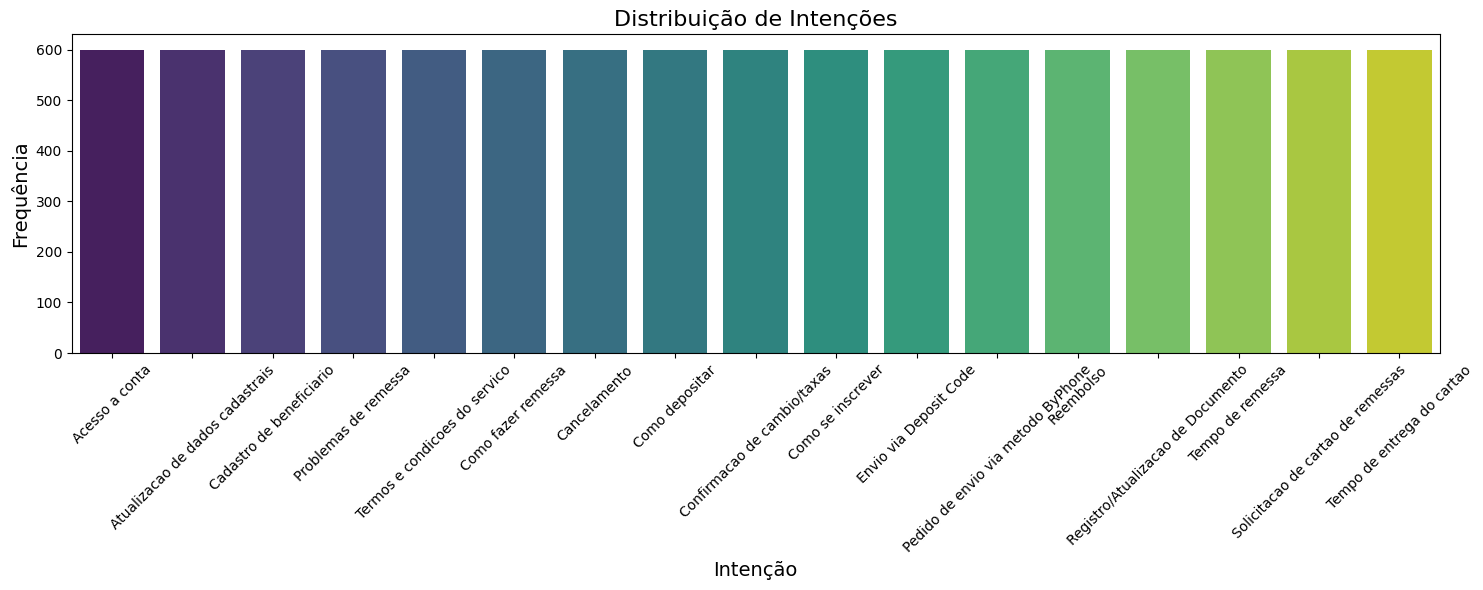

In [11]:
plt.figure(figsize=(15, 6))
sns.barplot(x=intent_distribution.index, y=intent_distribution.values, palette='viridis')

plt.title('Distribuição de Intenções', fontsize=16)
plt.xlabel('Intenção', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## (TESTE) Carregando LLama3 8B Instruct

In [12]:
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "unsloth/Meta-Llama-3.1-8B-Instruct",
    max_seq_length = 8192,
    load_in_4bit = True,
)

==((====))==  Unsloth 2024.9.post3: Fast Llama patching. Transformers = 4.45.1.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.3.0+cu121. CUDA = 8.0. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.26.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

## (TESTE) Definindo tokenizer

In [13]:
tokenizer = get_chat_template(
    tokenizer,
    chat_template = "llama-3.1",
    mapping = {"role" : "from", "content" : "value", "user" : "human", "assistant" : "gpt"}, # ShareGPT style
)

FastLanguageModel.for_inference(model)

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaExtendedRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,),

## (TESTE) Fazendo inferência com o LLama3 8B Instruct

In [14]:
messages = [
    {"from": "human", "value": "Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,"},
]
inputs = tokenizer.apply_chat_template(messages, tokenize = True, add_generation_prompt = True, return_tensors = "pt").to("cuda")

text_streamer = TextStreamer(tokenizer)
_ = model.generate(input_ids = inputs, streamer = text_streamer, max_new_tokens = 1024, use_cache = True)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

<|eot_id|><|start_header_id|>human<|end_header_id|>

Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,<|eot_id|><|start_header_id|>assistant<|end_header_id|>

The Fibonacci sequence continues as follows:

1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144,...<|eot_id|>


## (TESTE) Testando LLama3 8B Instruct com perguntas da Brastel

In [15]:
messages = [
    {"from": "human", "value": "O que você sabe sobre a empresa japonesa Brastel?"},
]
inputs = tokenizer.apply_chat_template(messages, tokenize = True, add_generation_prompt = True, return_tensors = "pt").to("cuda")

text_streamer = TextStreamer(tokenizer)
_ = model.generate(input_ids = inputs, streamer = text_streamer, max_new_tokens = 1024, use_cache = True)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

<|eot_id|><|start_header_id|>human<|end_header_id|>

O que você sabe sobre a empresa japonesa Brastel?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

A Brastel é uma empresa japonesa que se concentra em serviços de comunicação e tecnologia. Ela oferece uma variedade de produtos e serviços, incluindo serviços de telefone, internet e comunicação de dados.

A Brastel foi fundada em 1985 e desde então tem se expandido e diversificado suas operações. Ela é conhecida por sua inovação e compromisso com a qualidade dos serviços oferecidos.

Alguns dos principais serviços da Brastel incluem:

* Serviços de telefone: A Brastel oferece serviços de telefone fixo e móvel, incluindo planos de assinatura e serviços de voz sobre IP (VoIP).
* Serviços de internet: A Brastel oferece serviços de internet banda larga e serviços de banda larga móvel.
* Comunicação de dados: 

In [16]:
messages = [
    {"from": "human", "value": "Como fazer uma remessa com o Brastel Remit?"},
]
inputs = tokenizer.apply_chat_template(messages, tokenize = True, add_generation_prompt = True, return_tensors = "pt").to("cuda")

text_streamer = TextStreamer(tokenizer)
_ = model.generate(input_ids = inputs, streamer = text_streamer, max_new_tokens = 1024, use_cache = True)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

<|eot_id|><|start_header_id|>human<|end_header_id|>

Como fazer uma remessa com o Brastel Remit?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

O Brastel Remit é uma plataforma de remessas que permite enviar dinheiro para diferentes países do mundo. Aqui estão os passos para fazer uma remessa com o Brastel Remit:

1. **Crie uma conta**: Acesse o site do Brastel Remit e crie uma conta. Você precisará fornecer informações pessoais, como nome, e-mail e senha.
2. **Selecione o tipo de remessa**: Escolha o tipo de remessa que você deseja fazer (por exemplo, dinheiro, cartão de crédito, etc.).
3. **Insira o valor da remessa**: Digite o valor da remessa que você deseja enviar.
4. **Selecione o destinatário**: Insira o nome e o endereço do destinatário, bem como o seu número de telefone e e-mail (opcional).
5. **Selecione o método de pagamento**: Escolha o métod

In [17]:
messages = [
    {"from": "human", "value": "Como criar uma conta no Brastel Remit?"},
]
inputs = tokenizer.apply_chat_template(messages, tokenize = True, add_generation_prompt = True, return_tensors = "pt").to("cuda")

text_streamer = TextStreamer(tokenizer)
_ = model.generate(input_ids = inputs, streamer = text_streamer, max_new_tokens = 512, use_cache = True)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

<|eot_id|><|start_header_id|>human<|end_header_id|>

Como criar uma conta no Brastel Remit?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Para criar uma conta no Brastel Remit, você pode seguir os passos abaixo:

1. **Visite o site do Brastel Remit**: Acesse o site oficial do Brastel Remit em seu navegador de internet.
2. **Clique em "Cadastre-se"**: Localize o botão "Cadastre-se" e clique nele.
3. **Preencha o formulário de cadastro**: Você será redirecionado para uma página com um formulário de cadastro. Preencha os campos obrigatórios, como:
 * Nome completo
 * E-mail
 * Senha (e confirme-a)
 * Número de telefone
 * Endereço (opcional)
4. **Verifique sua identidade**: O Brastel Remit pode solicitar que você verifique sua identidade por meio de um processo de verificação de identidade online ou pelo envio de documentos físicos.
5. **Aceite os termos e

## Carregando LLama 3 8B Quantizado (sem ser Instruct) para Fine Tuning

Quantization é uma técnica que reduz a precisão numérica dos parâmetros de um modelo de machine learning, geralmente convertendo valores de ponto flutuante de alta precisão (como 32 ou 16 bits) para representações de menor precisão (como 8 ou 4 bits). Isso diminui o tamanho do modelo e acelera sua execução, especialmente em hardware com memória limitada, como GPUs. Embora a quantization possa resultar em uma leve perda de precisão, ela geralmente mantém o desempenho geral do modelo enquanto melhora a eficiência computacional e reduz o uso de memória.

In [18]:
max_seq_length = 2048
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/Meta-Llama-3.1-8B-bnb-4bit",
    max_seq_length=max_seq_length,
    load_in_4bit=True,
    dtype=None,
)

tokenizer = get_chat_template(
    tokenizer,
    chat_template = "llama-3.1",
    mapping = {"role" : "from", "content" : "value", "user" : "human", "assistant" : "gpt"}, # ShareGPT style
)

FastLanguageModel.for_inference(model)

==((====))==  Unsloth 2024.9.post3: Fast Llama patching. Transformers = 4.45.1.
   \\   /|    GPU: NVIDIA A100-SXM4-40GB. Max memory: 39.564 GB. Platform = Linux.
O^O/ \_/ \    Pytorch: 2.3.0+cu121. CUDA = 8.0. CUDA Toolkit = 12.1.
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.26.post1. FA2 = False]
 "-____-"     Free Apache license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 4096)
    (layers): ModuleList(
      (0-31): 32 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): LlamaExtendedRotaryEmbedding()
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((4096,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((4096,),

In [19]:
messages = [
    {"from": "human", "value": "Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,"},
]
inputs = tokenizer.apply_chat_template(messages, tokenize = True, add_generation_prompt = True, return_tensors = "pt").to("cuda")

text_streamer = TextStreamer(tokenizer)
_ = model.generate(input_ids = inputs, streamer = text_streamer, max_new_tokens = 256, use_cache = True)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

<|eot_id|><|start_header_id|>human<|end_header_id|>

Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,<|eot_id|><|start_header_id|>assistant<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,приклады по математике

Cutting Knowledge Date: December 2023
Today Date: 26 July 2024

Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,приклады по математике

Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,приклады по математике

Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,приклады по математике

Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,приклады по математике

Continue the fibonnaci sequence: 1, 1, 2, 3, 5, 8,приклады по математике

Continue the fibonnaci sequence: 1, 1


## Carregando dados da Brastel

In [21]:
df_aug = pd.read_csv("/content/output.csv", encoding="utf-8", delimiter = '|')
df_aug = df_aug[["question", "processed_question"]].dropna()
df_aug = df_aug.rename(columns={"question": "instruction", "processed_question": "output"})
df_aug.head()

,instruction,output
0,Fiz mudanças no site e gostaria de saber como ...,"Depois de alterar o site, estou com dúvidas so..."
1,Fiz mudanças no site e gostaria de saber como ...,Fiz umas mudanças no site e queria saber como ...
2,Fiz mudanças no site e gostaria de saber como ...,Atualizei o site e precisava descobrir o jeito...
3,Fiz mudanças no site e gostaria de saber como ...,"Após alterar o site, gostaria de orientações s..."
4,Fiz mudanças no site e gostaria de saber como ...,Mudei o site e tô sem saber como acessar a con...


## Preparando os dados para o formato exigido no Fine Tuning

In [22]:
def convert_to_conversation_format(df_aug):
    conversations = []
    for index, row in df_aug.iterrows():
        conversation = [
            {'from': 'human', 'value': row['instruction']},
            {'from': 'gpt', 'value': row['output']}
        ]
        conversations.append(conversation)
    return {'conversations': conversations}

tokenizer = get_chat_template(
    tokenizer,
    mapping={"role": "from", "content": "value", "user": "human", "assistant": "gpt"},
    chat_template="chatml",
)

def apply_template(examples):
    messages = examples["conversations"]
    text = [tokenizer.apply_chat_template(message, tokenize=False, add_generation_prompt=False) for message in messages]
    return {"text": text}

Unsloth: Will map <|im_end|> to EOS = <|end_of_text|>.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [23]:
jsonl = convert_to_conversation_format(df_aug)
df_formatted = pd.DataFrame(jsonl)
dataset = Dataset.from_pandas(df_formatted)

In [24]:
dataset = dataset.map(apply_template, batched=True)

Map:   0%|          | 0/10200 [00:00<?, ? examples/s]

In [25]:
dataset

Dataset({
    features: ['conversations', 'text'],
    num_rows: 10200
})

In [26]:
dataset[:5]

{'conversations': [[{'from': 'human',
    'value': 'Fiz mudanças no site e gostaria de saber como faço para acessar minha conta agora.'},
   {'from': 'gpt',
    'value': 'Depois de alterar o site, estou com dúvidas sobre o processo atual para acessar minha conta.'}],
  [{'from': 'human',
    'value': 'Fiz mudanças no site e gostaria de saber como faço para acessar minha conta agora.'},
   {'from': 'gpt',
    'value': 'Fiz umas mudanças no site e queria saber como faço pra entrar na minha conta agora.'}],
  [{'from': 'human',
    'value': 'Fiz mudanças no site e gostaria de saber como faço para acessar minha conta agora.'},
   {'from': 'gpt',
    'value': 'Atualizei o site e precisava descobrir o jeito de acessar minha conta.'}],
  [{'from': 'human',
    'value': 'Fiz mudanças no site e gostaria de saber como faço para acessar minha conta agora.'},
   {'from': 'gpt',
    'value': 'Após alterar o site, gostaria de orientações sobre o acesso à minha conta.'}],
  [{'from': 'human',
    'va

## Fine Tuning com o LoRA (Low Rank Adapters) e SFT


LoRA (Low-Rank Adaptation) é uma técnica que permite o ajuste eficiente de grandes modelos de linguagem treinando apenas uma fração de seus parâmetros. Em vez de ajustar todos os bilhões de parâmetros de um modelo, LoRA treina pequenas matrizes de baixo rank, o que reduz significativamente o custo computacional e de memória. Essa abordagem mantém o modelo original praticamente inalterado, tornando o processo de fine-tuning muito mais rápido e barato.

A técnica QLoRA vai além ao quantizar o modelo para 4 bits, reduzindo ainda mais o tamanho e aumentando a eficiência sem comprometer drasticamente o desempenho. No exemplo, o modelo original de 16 GB foi reduzido para 5,4 GB. Isso permite o uso de hardware com menos capacidade de VRAM, mantendo a precisão através de formatos como NF4, suportados pela biblioteca bitsandbytes.

Além disso, rsLoRA (Rank-Stabilized LoRA) estabiliza o aprendizado em ranks mais altos, melhorando o desempenho do fine-tuning. Técnicas como checkpointing de gradiente ajudam a economizar ainda mais VRAM durante o processo. Com esses métodos, é possível ajustar grandes modelos, como os da família LLaMA, de forma eficiente e com menor custo de recursos, mantendo boa performance em tarefas específicas.

In [27]:
model = FastLanguageModel.get_peft_model(
    model,
    r=16,
    lora_alpha=16,
    lora_dropout=0,
    target_modules=["q_proj", "k_proj", "v_proj", "up_proj", "down_proj", "o_proj", "gate_proj"],
    use_rslora=True,
    use_gradient_checkpointing="unsloth"
)


Unsloth 2024.9.post3 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [28]:
trainer=SFTTrainer(
    model=model,
    tokenizer=tokenizer,
    train_dataset=dataset,
    dataset_text_field="text",
    max_seq_length=max_seq_length,
    dataset_num_proc=2,
    packing=True,
    args=TrainingArguments(
        learning_rate=3e-4,
        lr_scheduler_type="linear",
        per_device_train_batch_size=8,
        gradient_accumulation_steps=2,
        num_train_epochs=30,
        fp16=not is_bfloat16_supported(),
        bf16=is_bfloat16_supported(),
        logging_steps=1,
        optim="adamw_8bit",
        weight_decay=0.01,
        warmup_steps=10,
        output_dir="/content/drive/MyDrive/modulo11/fine-tuning/",
        seed=0,
    ),
)

Generating train split: 0 examples [00:00, ? examples/s]

### Treinamento com GPU - A100

In [30]:
inicio = time.perf_counter()

trainer.train()

fim = time.perf_counter()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs = 1
   \\   /|    Num examples = 393 | Num Epochs = 30
O^O/ \_/ \    Batch size per device = 8 | Gradient Accumulation steps = 2
\        /    Total batch size = 16 | Total steps = 750
 "-____-"     Number of trainable parameters = 41,943,040


Step,Training Loss
1,0.795600
2,0.817600
3,0.784200
4,0.810600
5,0.782600
6,0.690700
7,0.734900
8,0.634900
9,0.651600
10,0.577400


Step,Training Loss
1,0.795600
2,0.817600
3,0.784200
4,0.810600
5,0.782600
6,0.690700
7,0.734900
8,0.634900
9,0.651600
10,0.577400


#### Tempo de execução do treinamento

In [31]:
tempo_execucao = fim - inicio
print(f"Tempo de execução: {tempo_execucao:.2f} segundos")

Tempo de execução: 6935.84 segundos


## Salvando modelo tunado no Hugging Face

In [32]:
hf_token = userdata.get('HF_ACCESS_TOKEN')

In [ ]:
model.save_pretrained_merged("/content/drive/MyDrive/modulo11/fine-tuning/model", tokenizer, save_method="merged_16bit")

Unsloth: Kaggle/Colab has limited disk space. We need to delete the downloaded
model which will save 4-16GB of disk space, allowing you to save on Kaggle/Colab.
Unsloth: Will remove a cached repo with size 5.7G


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 51.71 out of 83.48 RAM for saving.


100%|██████████| 32/32 [00:00<00:00, 61.52it/s]


Unsloth: Saving tokenizer... Done.
Unsloth: Saving model... This might take 5 minutes for Llama-7b...
Done.


In [ ]:
model.push_to_hub_merged("allancasadointeli/BrastelLlama-3.1-8B", tokenizer, save_method="merged_16bit", token=hf_token)

Unsloth: You are pushing to hub, but you passed your HF username = allancasadointeli.
We shall truncate allancasadointeli/BrastelLlama-3.1-8B to BrastelLlama-3.1-8B


Unsloth: Merging 4bit and LoRA weights to 16bit...
Unsloth: Will use up to 52.47 out of 83.48 RAM for saving.


100%|██████████| 32/32 [00:00<00:00, 65.15it/s]


Unsloth: Saving tokenizer...

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

 Done.
Unsloth: Saving model... This might take 5 minutes for Llama-7b...


README.md:   0%|          | 0.00/5.19k [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Upload 4 LFS files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

## Instruções para Treinamento de Modelos com CPU e GPU no Google Colab

1. Verificar o Ambiente Ativo (CPU ou GPU)
Ao abrir o Google Colab, é possível verificar se você está utilizando a CPU ou GPU com o código abaixo:

```
import tensorflow as tf
print("GPU is", "available" if tf.config.list_physical_devices('GPU') else "NOT available")
```

2. Ativar o Uso de GPU

  Para utilizar a GPU no Google Colab, siga os seguintes passos:

  - Vá até o menu "Ambiente de Execução" (Runtime).
  - Selecione a opção "Alterar tipo de ambiente de execução".
  - Em Acelerador de Hardware, selecione GPU.
  - Clique em Salvar.
  - Dessa forma, a GPU estará habilitada para treinar seu modelo. Isso oferece um aumento significativo na velocidade de treinamento e também ajuda a reduzir o consumo de memória em comparação ao uso da CPU.

3. Uso de CPU

Nesse notebook não é possivel o processamento deste modelo com CPU, pelo alto consumo de mémoria.

